##  Movie Data Sentiment Analysis

 1.  Data (words) Encoding/Embedding: 
      - Training data X:  
        --  each word is embedded to 32 real values,  
        --  each post (sample data) is padded to 500 words,   
        --  each training X_i is 16000 = 32*500 long 1-d vector  
        
      - labels Y: 1/0 binary class
          
            
 2. Model
    - DNN
    - CNN
 
updated 11/8/2020


## 1. DNN model


In [650]:
# !pip install tensorflow

In [651]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import sequence

# MLP for the IMDB problem
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [652]:
"""#Read the data
df=pd.read_csv('C:\\Users\\attor\\Downloads\\news.csv')

#Get shape and head
display(df.shape)
df.head()"""

"#Read the data\ndf=pd.read_csv('C:\\Users\\attor\\Downloads\\news.csv')\n\n#Get shape and head\ndisplay(df.shape)\ndf.head()"

In [653]:
"""

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2)

# Preprocess the data
tokenizer = Tokenizer(num_words=vocab)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
max_length = max(len(x) for x in X_train)
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)

# Check the data samples size
print("X_train sample size:", X_train.shape)   # e.g., (8000, 1000)
print("X_test  sample size:", X_test.shape)    # e.g., (2000, 1000)"""


'\n\nX_train, X_test, y_train, y_test = train_test_split(df[\'text\'], df[\'label\'], test_size=0.2)\n\n# Preprocess the data\ntokenizer = Tokenizer(num_words=vocab)\ntokenizer.fit_on_texts(X_train)\nX_train = tokenizer.texts_to_sequences(X_train)\nX_test = tokenizer.texts_to_sequences(X_test)\nmax_length = max(len(x) for x in X_train)\nX_train = pad_sequences(X_train, maxlen=max_length)\nX_test = pad_sequences(X_test, maxlen=max_length)\n\n# Check the data samples size\nprint("X_train sample size:", X_train.shape)   # e.g., (8000, 1000)\nprint("X_test  sample size:", X_test.shape)    # e.g., (2000, 1000)'

In [654]:
"""# # MLP for the IMDB problem

# load the dataset but only keep the top n words, this is the vocab size
vocab = 5000 #vocab_size is no.of words to consider from the dataset, ordering based on frequency.

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab)

# Chech the data samples size
print("X_train sample size:", X_train.shape)         # total we have 25 000 samples
print("X_test  sample size:", X_test.shape)            # total we have 25 000 samples"""

'# # MLP for the IMDB problem\n\n# load the dataset but only keep the top n words, this is the vocab size\nvocab = 5000 #vocab_size is no.of words to consider from the dataset, ordering based on frequency.\n\n(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab)\n\n# Chech the data samples size\nprint("X_train sample size:", X_train.shape)         # total we have 25 000 samples\nprint("X_test  sample size:", X_test.shape)            # total we have 25 000 samples'

In [655]:
df = pd.read_csv('C:\\Users\\attor\\Downloads\\news.csv')

# Extract the input and target variables
X = df['text'].values
y = df['label'].values

# Tokenize the text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
le = LabelEncoder()
y = le.fit_transform(y)

# Pad sequences to the same length
max_length = 500 # originally 100 , i think ??
X = pad_sequences(X, maxlen=max_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the data sample size
print("X_train sample size:", X_train.shape)
print("X_test  sample size:", X_test.shape)

X_train sample size: (5068, 500)
X_test  sample size: (1267, 500)


In [656]:
"""texts = df['text'].values
labels = df['label'].values
"""

"texts = df['text'].values\nlabels = df['label'].values\n"

In [657]:
# Set the vocabulary size and maximum sequence length
vocab_size = 5000
max_length = 1000

# Tokenize the texts
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Pad the sequences
X = pad_sequences(sequences, maxlen=max_length)

In [658]:
#X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

In [659]:
"""# labels: binary class problem
print("y_train size:", len(y_train) )
print("y_test  size:", len(y_test))

print("The first 10 label of trainging data", y_train[0:10])"""

'# labels: binary class problem\nprint("y_train size:", len(y_train) )\nprint("y_test  size:", len(y_test))\n\nprint("The first 10 label of trainging data", y_train[0:10])'

In [660]:
# words are encoding to integers: integer = the index of this word in the vocab list
print(X_train[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [661]:
"""# check the first post (sample)
print("The length of first message:", len(X_train[0]) )


# For each sample, keep only 500 words, some are short and some are long, we keep them as the same size 
# for short message: add 0s; for long message: first 500 words)
max_words = 500



X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
print("traing data words:", len(X_train[0])  )# each one to pad to the same size: shorter: + 0, longer: cut

print("the last 10 words' indices in the Vocab list:",  X_train[0][-10:]) """

'# check the first post (sample)\nprint("The length of first message:", len(X_train[0]) )\n\n\n# For each sample, keep only 500 words, some are short and some are long, we keep them as the same size \n# for short message: add 0s; for long message: first 500 words)\nmax_words = 500\n\n\n\nX_train = sequence.pad_sequences(X_train, maxlen=max_words)\nX_test = sequence.pad_sequences(X_test, maxlen=max_words)\nprint("traing data words:", len(X_train[0])  )# each one to pad to the same size: shorter: + 0, longer: cut\n\nprint("the last 10 words\' indices in the Vocab list:",  X_train[0][-10:]) '

In [662]:
"""# what words are they?
word_to_idx_dict = imdb.get_word_index()
n = len(word_to_idx_dict)

print("Number distinct words in reviews = %d \n" % n)
word_to_idx_dict

# # sort dict by index
sorted(word_to_idx_dict.items(),  key=lambda x: x[1])
"""

'# what words are they?\nword_to_idx_dict = imdb.get_word_index()\nn = len(word_to_idx_dict)\n\nprint("Number distinct words in reviews = %d \n" % n)\nword_to_idx_dict\n\n# # sort dict by index\nsorted(word_to_idx_dict.items(),  key=lambda x: x[1])\n'

### Word embeding
This is a technique where words are encoded as real-valued vectors in a high-dimensional space, where the similarity between words in terms of meaning translates to closeness in the vector space.

Discrete words are mapped to vectors of continuous numbers. This is useful when working with natural language problems with neural networks and deep learning models are we require numbers as input.

Keras provides a convenient way to convert positive integer representations of words into a word embedding by an Embedding layer.

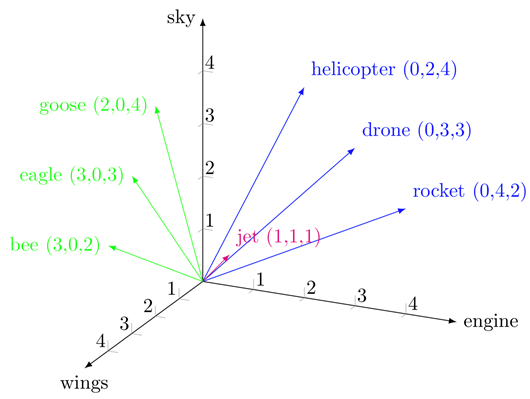

In [663]:
# layers.Embedding(vocab, embeding_size, input_length_each_sample))

# create model
max_words = 500 # originally, 500
model = keras.Sequential()
model.add(layers.Embedding(vocab, 32, input_length=max_words))           # max_words = 500, each word embeded to 32 real numbers
model.add(layers.Flatten())                                              # 32*500 = 16000 for each input
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(40, activation='relu')) # added layer
model.add(layers.Dropout(0.25))  # Dropout layer added here
model.add(layers.Dense(40, activation='relu')) # added layer
model.add(layers.Dropout(0.25))  # Dropout layer added here
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_54 (Embedding)    (None, 500, 32)           160000    
                                                                 
 flatten_54 (Flatten)        (None, 16000)             0         
                                                                 
 dense_155 (Dense)           (None, 100)               1600100   
                                                                 
 dense_156 (Dense)           (None, 40)                4040      
                                                                 
 dropout_46 (Dropout)        (None, 40)                0         
                                                                 
 dense_157 (Dense)           (None, 40)                1640      
                                                                 
 dropout_47 (Dropout)        (None, 40)              

In [664]:
# traing the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=6, batch_size=128, verbose=1) # originaly epochs = 2,

Epoch 1/6
40/40 [==============================] - 3s 50ms/step - loss: 0.5985 - accuracy: 0.6742 - val_loss: 0.4509 - val_accuracy: 0.8098
Epoch 2/6
40/40 [==============================] - 2s 51ms/step - loss: 0.3440 - accuracy: 0.8658 - val_loss: 0.2857 - val_accuracy: 0.9053
Epoch 3/6
40/40 [==============================] - 2s 54ms/step - loss: 0.1273 - accuracy: 0.9532 - val_loss: 0.3053 - val_accuracy: 0.9140
Epoch 4/6
40/40 [==============================] - 2s 56ms/step - loss: 0.0414 - accuracy: 0.9866 - val_loss: 0.3502 - val_accuracy: 0.9116
Epoch 5/6
40/40 [==============================] - 2s 54ms/step - loss: 0.0163 - accuracy: 0.9955 - val_loss: 0.3781 - val_accuracy: 0.9179
Epoch 6/6
40/40 [==============================] - 2s 52ms/step - loss: 0.0035 - accuracy: 0.9998 - val_loss: 0.4666 - val_accuracy: 0.9179


In [665]:
# function for Report and Confusion Matrix Heatmap    
# plotting
import matplotlib.pyplot as plt
import seaborn as sns
# machine learning 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def report_heatmap(y_pred):
    """
    print report and plot the confusion matrix
    
    parameters: y_pred, a list of predicted labels
    
    return: None
    
    
    """
    # overall accuracy 
    acc = accuracy_score(y_test, y_pred)
    print( f'Overall Accuracy: {acc*100:.2f}%' )
    print("--------------------------")    
    
    # report
    print(classification_report(y_test, y_pred))
   
    # confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Confusion Matrix Heatmap
    labels = ["0", "1"]
    plt.figure(1, figsize=(8, 5))

    plt.title("Confusion Matrix")

    sns.set(font_scale=1.4)
    ax = sns.heatmap(cm, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'}) # Yellow + Green + Blue

    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

    ax.set(ylabel="True Label", xlabel="Predicted Label")

    plt.show( )



40/40 [==============================] - 0s 5ms/step
Overall Accuracy: 91.79%
--------------------------
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       628
           1       0.91      0.93      0.92       639

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



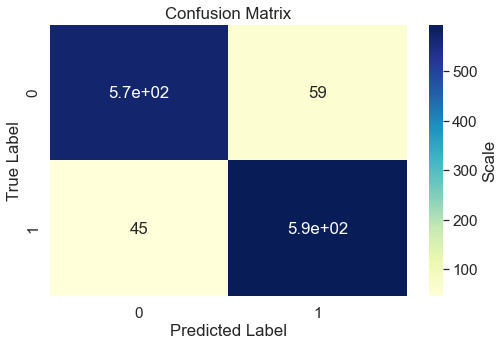

In [666]:
# Final evaluation of the model
y_pred_prob = model.predict(X_test) # two probabilites for each sample
y_pred = (y_pred_prob >= 0.5).astype("int32")
y_pred 


# # display report
report_heatmap(y_pred)

## 2. CNN model

In [667]:
# use the same data Train/test 

In [668]:

# create the model
model =keras.Sequential()
model.add(layers.Embedding(vocab, 32, input_length=max_words))
model.add(layers.Conv1D(32, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling1D())
model.add(layers.Flatten())
model.add(layers.Dense(250, activation='relu')) 
model.add(layers.Dense(120, activation='relu')) # added layer
model.add(layers.Dropout(0.25))  # Dropout layer added here
model.add(layers.Dense(100, activation='relu')) # added layer
model.add(layers.Dropout(0.25))  # Dropout layer added here
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_55 (Embedding)    (None, 500, 32)           160000    
                                                                 
 conv1d_23 (Conv1D)          (None, 500, 32)           3104      
                                                                 
 max_pooling1d_23 (MaxPoolin  (None, 250, 32)          0         
 g1D)                                                            
                                                                 
 flatten_55 (Flatten)        (None, 8000)              0         
                                                                 
 dense_159 (Dense)           (None, 250)               2000250   
                                                                 
 dense_160 (Dense)           (None, 120)               30120     
                                                     

In [669]:
"""model = keras.Sequential()
model.add(layers.Reshape((max_words, 32, 1, 1), input_shape=(max_words, 32)))
model.add(layers.Conv3D(32, (3, 3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling3D(pool_size=(2, 2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(250, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
"""

"model = keras.Sequential()\nmodel.add(layers.Reshape((max_words, 32, 1, 1), input_shape=(max_words, 32)))\nmodel.add(layers.Conv3D(32, (3, 3, 3), padding='same', activation='relu'))\nmodel.add(layers.MaxPooling3D(pool_size=(2, 2, 2)))\nmodel.add(layers.Flatten())\nmodel.add(layers.Dense(250, activation='relu'))\nmodel.add(layers.Dense(1, activation='sigmoid'))\nmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])\nmodel.summary()\n"

In [670]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=8, batch_size=128, verbose=2) # originally, epochs=3


Epoch 1/8
40/40 - 6s - loss: 0.6401 - accuracy: 0.6365 - val_loss: 0.5283 - val_accuracy: 0.8137 - 6s/epoch - 144ms/step
Epoch 2/8
40/40 - 4s - loss: 0.3484 - accuracy: 0.8502 - val_loss: 0.2559 - val_accuracy: 0.9061 - 4s/epoch - 107ms/step
Epoch 3/8
40/40 - 4s - loss: 0.1113 - accuracy: 0.9625 - val_loss: 0.1904 - val_accuracy: 0.9329 - 4s/epoch - 105ms/step
Epoch 4/8
40/40 - 4s - loss: 0.0352 - accuracy: 0.9927 - val_loss: 0.2525 - val_accuracy: 0.9313 - 4s/epoch - 103ms/step
Epoch 5/8
40/40 - 4s - loss: 0.0127 - accuracy: 0.9964 - val_loss: 0.2293 - val_accuracy: 0.9424 - 4s/epoch - 101ms/step
Epoch 6/8
40/40 - 4s - loss: 0.0025 - accuracy: 0.9998 - val_loss: 0.2713 - val_accuracy: 0.9416 - 4s/epoch - 106ms/step
Epoch 7/8
40/40 - 4s - loss: 6.6704e-04 - accuracy: 1.0000 - val_loss: 0.3086 - val_accuracy: 0.9408 - 4s/epoch - 103ms/step
Epoch 8/8
40/40 - 4s - loss: 3.4775e-04 - accuracy: 1.0000 - val_loss: 0.3118 - val_accuracy: 0.9424 - 4s/epoch - 101ms/step


40/40 [==============================] - 0s 8ms/step
Overall Accuracy: 94.24%
--------------------------
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       628
           1       0.94      0.95      0.94       639

    accuracy                           0.94      1267
   macro avg       0.94      0.94      0.94      1267
weighted avg       0.94      0.94      0.94      1267



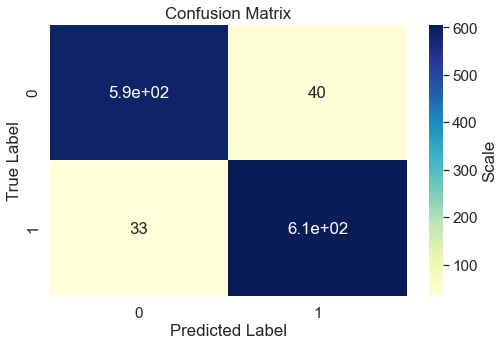

In [671]:
# Predict on the test 
y_pred_prob = model.predict(X_test) # two probabilites for each sample
y_pred = (y_pred_prob >= 0.5).astype("int32")
y_pred 


# # display report
report_heatmap(y_pred)

In [672]:
# end
# a little bit overfitting: use dropout can fix it.

REF: https://machinelearningmastery.com/predict-sentiment-movie-reviews-using-deep-learning/